<a href="https://colab.research.google.com/github/kieschka/DSproject/blob/main/DSproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Индивидуальный проект: **Предсказание увольнение сотрудника**

Автор: **Кошмухамбетова Дина Валерьевна**

Проверяющий: **Алексеева Екатерина Андреевна**

Ссылка на датасет:https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset 

### Примерный план (подстроить план под вашу задачу)
1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация
4. Создание тестовой и тренировочной выборки
5. Метод k-ближайших соседей
6. Выбор сложной модели
7. Выводы

## 1. Цель и задачи исследования

В данном проекте я собираюсь рассмотреть, какие факторы и признаки влияют на решение людей увольняться с работы. 

## 2. Описание набора данных

Данные взяты из: 

[Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)


### Описание данных

Выбираю файл с которым планирую работать

In [ ]:
!gdown --id 1p0_-AtfLmoFCaufZdXYBbP4YpMJT6AJN


#https://drive.google.com/file/d/1p0_-AtfLmoFCaufZdXYBbP4YpMJT6AJN/view?usp=share_link

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1p0_-AtfLmoFCaufZdXYBbP4YpMJT6AJN
To: /content/employee_attrition.csv
100% 228k/228k [00:00<00:00, 91.1MB/s]


Датасет представлен в виде каких файлов? Сколько их?
Как собирались данные? Для чего — просто коротко о датасете.
Описать объем данных.

- Выборка включает 1470 записей и 35 признаков (строки и столбцы соответственно).
- Целевая переменная Attrition — означает уволился человек или нет;

- Количественные переменные:
    - **название признака#1** — что обозначает этот признак;
    - ....
    - **название признака#N** — что обозначает этот признак;
    
- Категориальные переменные:

    - **название признака#1** — что обозначает этот признак;
    - ....
    - **название признака#N** — что обозначает этот признак;

Если вы на этом шаге уже не планируете использовать какой-то признак, напишите об этом. 

# Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация

Подключаю библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


Создаю датасет с данными из файла:

In [ ]:
df = pd.read_csv('employee_attrition.csv') 

Смотрю, что из себя представляет информация в датасете:

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Информация о датасете:
(здесь сразу видно, что информация представлена без пропусков)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Смотрю как распределяются значения в целевой переменной:

In [ ]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Заменяю "No" и "Yes" на 0 и 1

In [ ]:
df.Attrition = df.Attrition.factorize(['Yes','No'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Оцениваю параметр возраста: самые часто встречающиеся значения и распределение. Сразу оцениваю распределение на нормальность (отклоняю нулевую гипотезу о нормальности)???

In [ ]:
df.Age.value_counts().head()

35    78
34    77
36    69
31    69
29    68
Name: Age, dtype: int64

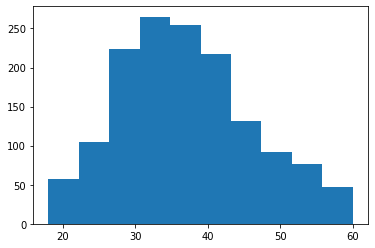

In [ ]:
plt.hist(df.Age);

In [ ]:
stats.shapiro(df['Age'])

ShapiroResult(statistic=0.9774479269981384, pvalue=2.0348782405724304e-14)

На превью видно, что в столбцах Over18, EmployeeCount и StandardHours значения одинаковые, проверяю количество уникальных значений.

In [ ]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [ ]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [ ]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

Значения одинаковые- удаляю эти столбцы как неинформативные

In [ ]:
df = df.drop(['Over18','StandardHours', 'EmployeeCount'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


Смотрю данные по столбцам:

In [ ]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

заменяю оставшиеся категориальные признаки на числовые значения:

In [ ]:
columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for x in columns:
    df[x]=preprocessing.LabelEncoder().fit_transform(df[x])
    
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


Строю матрицу корреляций:

In [ ]:
corr = df.corr()

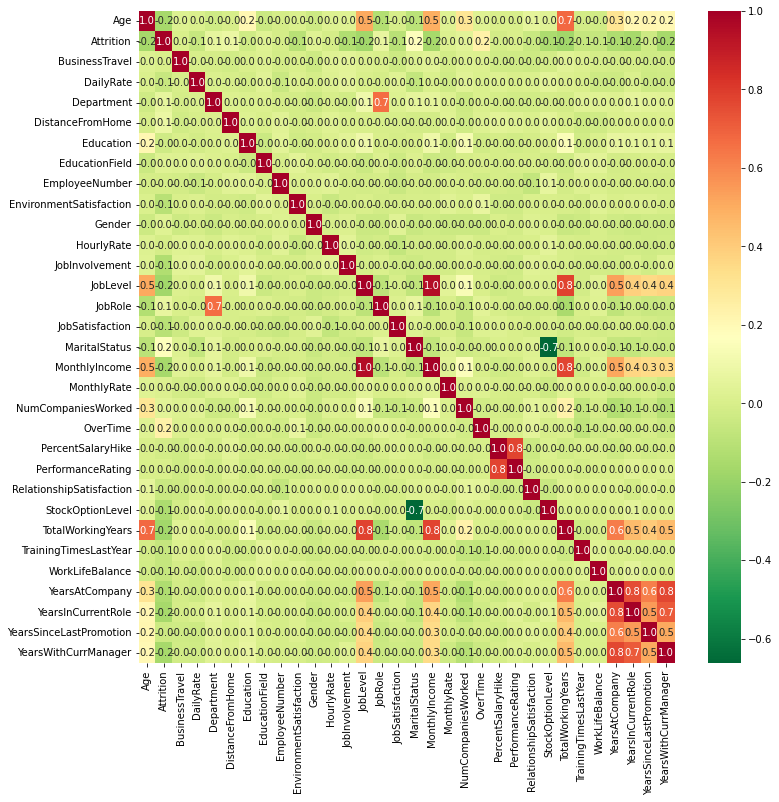

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cbar=True,cmap="RdYlGn_r",fmt='.1f')

Визуализирую данные по столбцам указанным ниже:

In [ ]:
df_vis = df[['Age','JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

Тут можно наблюдать отсутствие нормального распределения по всем указанным столбцам.

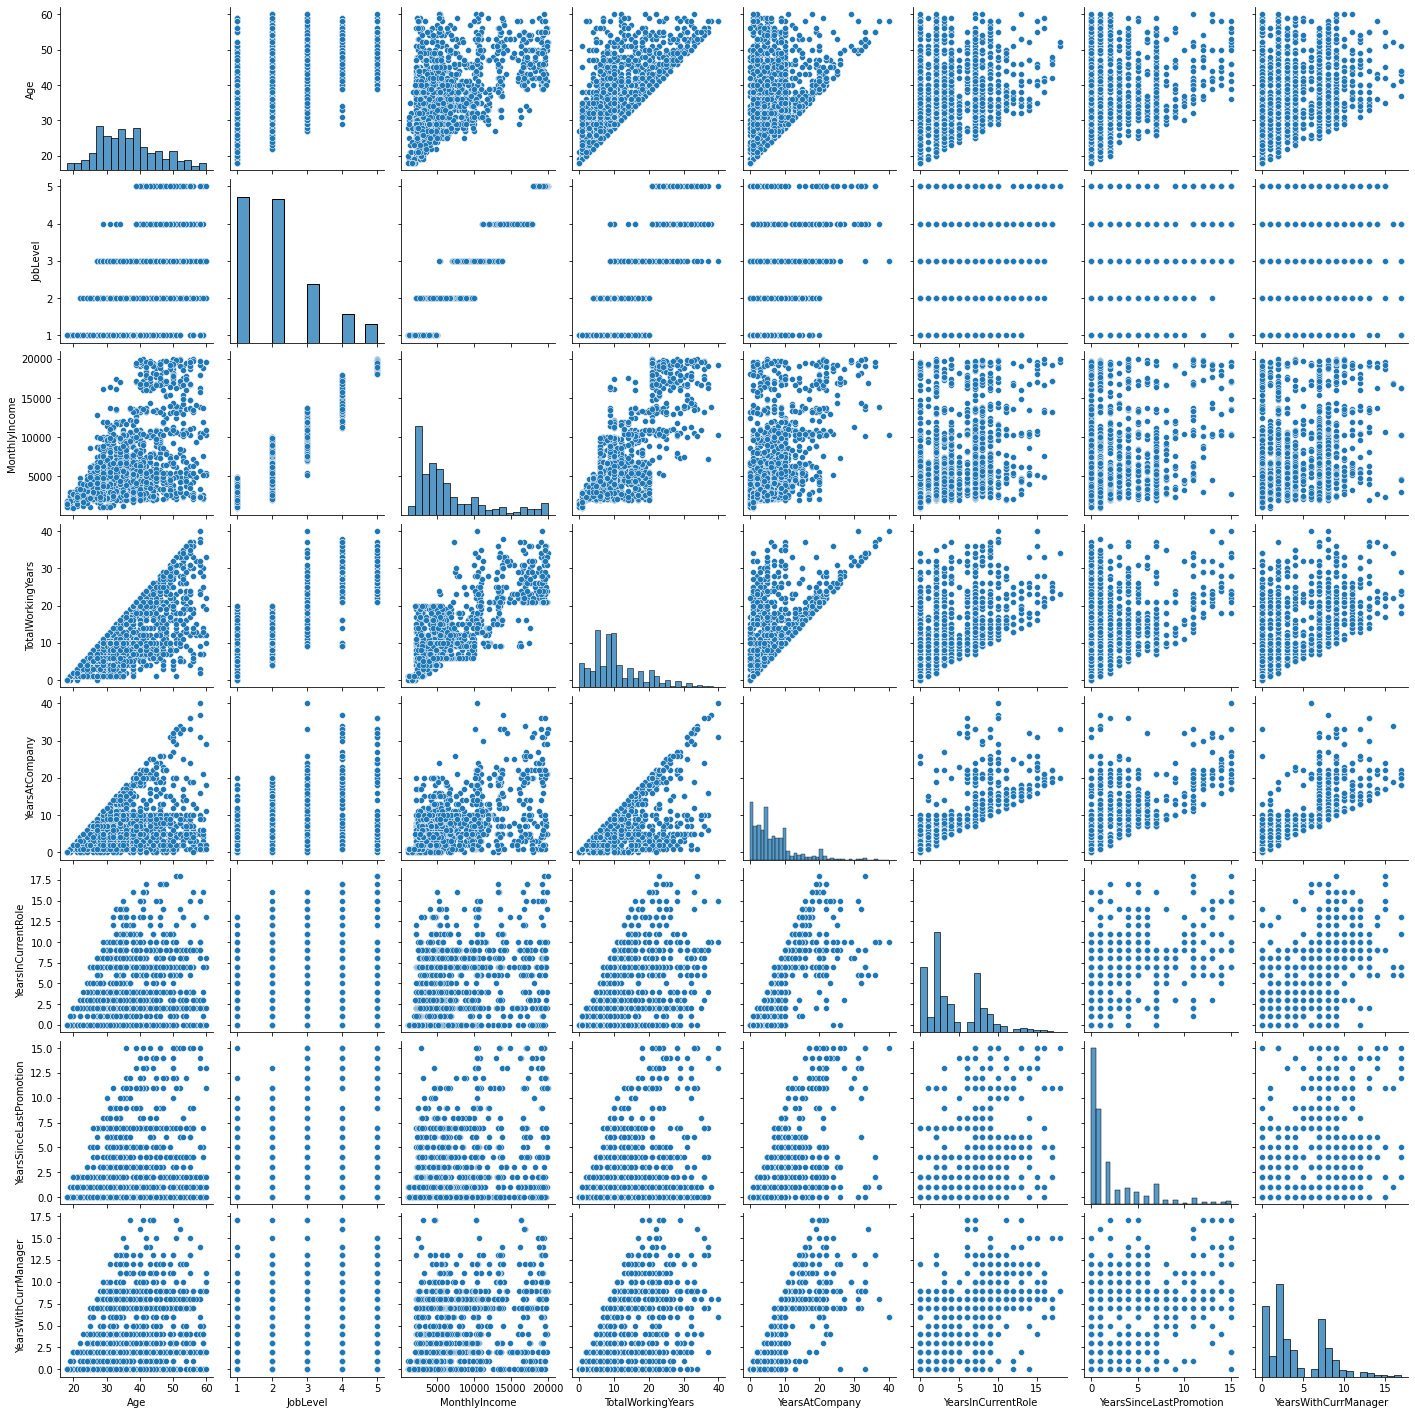

In [ ]:
sns.pairplot(df_vis)

Теперь строю визуализацию в разрезе значения целевой переменной:

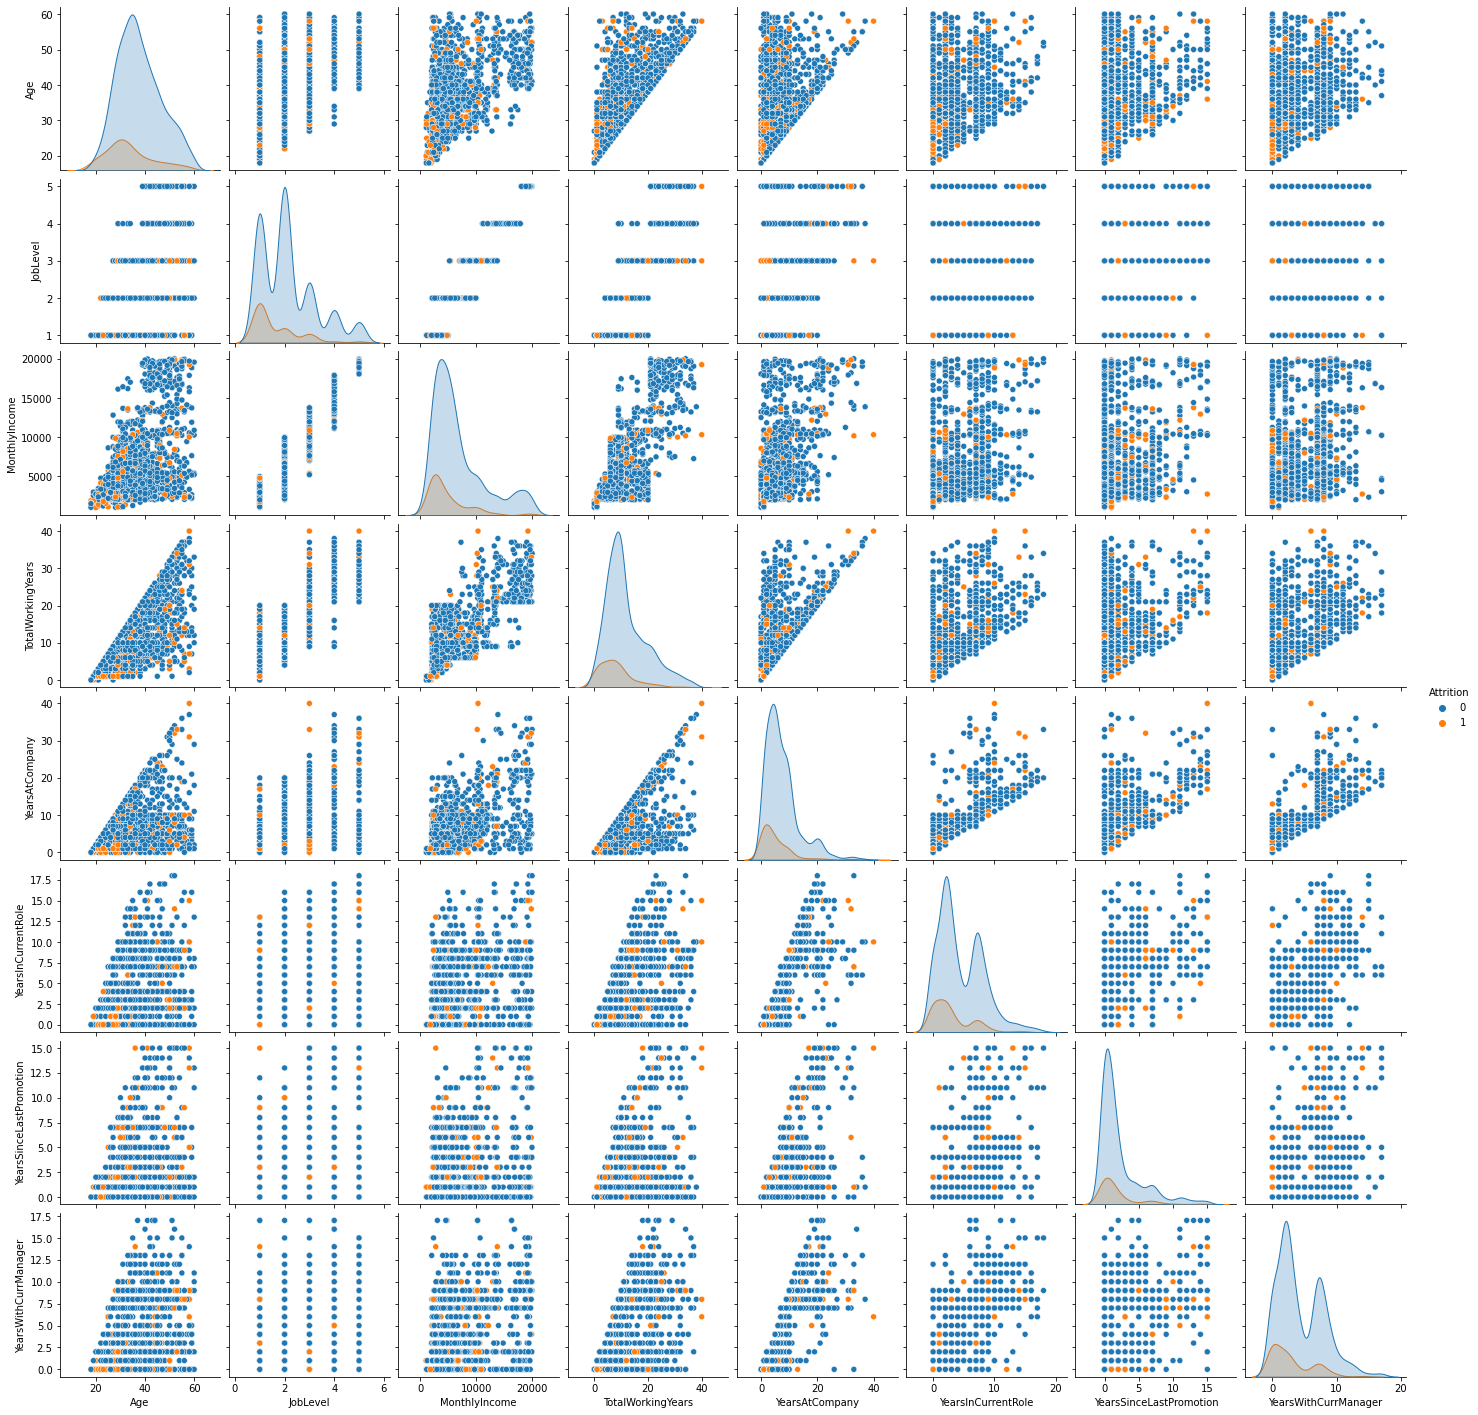

In [ ]:
df_vis = df_vis.join(df.Attrition)
sns.pairplot(df_vis, hue='Attrition')

Оцениваю связь удовлетворенности условиями работы и увольнения:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


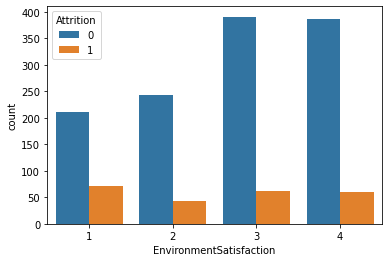

In [ ]:
sns.countplot(df['EnvironmentSatisfaction'], hue=df['Attrition'])

In [ ]:
df[df.Attrition == 1].EnvironmentSatisfaction.value_counts()

1    72
3    62
4    60
2    43
Name: EnvironmentSatisfaction, dtype: int64

 1. Более молодые сотрудники, которые только начали работать в компании, увольняются чаще, чем аналогичные сотрудники постарше. Возможные причины: некачественный онбординг сотрудников на джуниор позициях, более активное участие молодых сотрудников на рынке труда, переход сотрудников старше на более высокие позиции.
 2. Корреляция между увольнением и удовлетворенностью условиями работы слабая. Увольняются как сотрудники, недовольные условиями, так и те, кого все устраивает. В случае с последними, вероятнее всего их переход на более высокую позицию в другую компанию.
 

# Создание тестовой и тренировочной выборки

In [ ]:
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 31), (441, 31), (1029,), (441,))

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 31)
(1029, 31)
(441, 31)


In [ ]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)
#Splitting data for train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
#shape of the data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 31)
(1176, 31)
(294, 31)


# Метод k-ближайших соседей

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 6)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.8095238095238095

In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=6)
knn_cv.fit(X_train,y_train)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.83673469 0.83333333 0.83673469 0.84693878 0.85034014]
cv_scores mean:0.8408163265306123


In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 4}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8462585034013606

# Выбор сложной модели

In [ ]:
models=[]

models.append(('Logistic Regression',LogisticRegression(solver='liblinear',C=0.3,fit_intercept=True)))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))

n_folds=5
results=[]
labels=['Not Resigned','Resigned']

for name,model in models:
    K_fold=model_selection.KFold(n_splits=n_folds)
    print('Testing model',name)
    
    #cross validation of results
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=K_fold,scoring='f1_weighted',verbose=0,n_jobs=-1)
    
    #fitting the model
    model.fit(X_train,y_train)
    #running predictions and accuracy calculation
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_score=accuracy_score(train_pred,y_train)
    test_score=accuracy_score(test_pred,y_test)
    
    #adding the results to the list 
    results.append(cv_results)
    message=f"Cross_validation mean:{cv_results.mean()},Training Accuracy:{train_score},Test Accuracy:{test_score}"
    print(message)
    print(classification_report(y_test,test_pred,target_names=labels))
    print(confusion_matrix(y_test,test_pred,labels=[0,1]))

Testing model Logistic Regression
Cross_validation mean:0.8493946275642911,Training Accuracy:0.8852040816326531,Test Accuracy:0.8435374149659864
              precision    recall  f1-score   support

Not Resigned       0.85      0.98      0.91       236
    Resigned       0.77      0.29      0.42        58

    accuracy                           0.84       294
   macro avg       0.81      0.64      0.67       294
weighted avg       0.83      0.84      0.81       294

[[231   5]
 [ 41  17]]
Testing model Random Forest Classifier
Cross_validation mean:0.8153007687357396,Training Accuracy:1.0,Test Accuracy:0.8231292517006803
              precision    recall  f1-score   support

Not Resigned       0.82      0.99      0.90       236
    Resigned       0.80      0.14      0.24        58

    accuracy                           0.82       294
   macro avg       0.81      0.56      0.57       294
weighted avg       0.82      0.82      0.77       294

[[234   2]
 [ 50   8]]
Testing model Gradie

In [ ]:
strong_models=LogisticRegression(solver='liblinear')
param={'C':(0.2,0.3,0.35,0.45,0.55),'fit_intercept':('True','False')}
clf=GridSearchCV(strong_models,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.2, 0.3, 0.35, 0.45, 0.55),
                         'fit_intercept': ('True', 'False')})

In [ ]:
#print the results of the Grid search as a data frame
res=pd.DataFrame.from_dict(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005094,0.000345,0.000464,0.000058,0.2,True,"{'C': 0.2, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.876596,0.863830,0.869037,0.010677,7
1,0.005440,0.000953,0.000466,0.000011,0.2,False,"{'C': 0.2, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.876596,0.863830,0.869037,0.010677,7
2,0.005066,0.000124,0.000445,0.000018,0.3,True,"{'C': 0.3, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.876596,0.872340,0.870739,0.010385,1
3,0.005470,0.000699,0.000504,0.000136,0.3,False,"{'C': 0.3, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.876596,0.872340,0.870739,0.010385,1
4,0.005401,0.000589,0.000525,0.000101,0.35,True,"{'C': 0.35, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.876596,0.868085,0.869888,0.010393,5
5,0.005326,0.000274,0.000483,0.000023,0.35,False,"{'C': 0.35, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.876596,0.868085,0.869888,0.010393,5
6,0.005293,0.000185,0.000490,0.000016,0.45,True,"{'C': 0.45, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.872340,0.868085,0.869037,0.009975,7
7,0.005333,0.000187,0.000489,0.000019,0.45,False,"{'C': 0.45, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.872340,0.868085,0.869037,0.009975,7
8,0.005319,0.000251,0.000478,0.000022,0.55,True,"{'C': 0.55, 'fit_intercept': 'True'}",0.881356,0.855319,0.87234,0.876596,0.868085,0.870739,0.008881,1
9,0.005320,0.000259,0.000462,0.000015,0.55,False,"{'C': 0.55, 'fit_intercept': 'False'}",0.881356,0.855319,0.87234,0.876596,0.868085,0.870739,0.008881,1


In [ ]:
clf.best_params_

{'C': 0.3, 'fit_intercept': 'True'}

In [ ]:
clf.best_score_

0.870739271547061

# Выводы

Я выбрала метод ближайших соседей для простой модели, потому что на визуализациях видно, что сотрудники с искомой целевой переменной хоть и не образуют кластер, но распределяются чаще всего с определенной закономерностью: по несколько штук рядом. Для сложной модели изначально попробовала запустить три различные, и далее использовала более результативную с точки зрения валидации модели на тестовой выборке.

Метод ближайших соседей показал меньшую точность по сравнению с логистической регрессей, но разница скорее не критичная: зависит от целей для которых будет использоваться модель.

В целом, предиктивные модели показали отличный результат на данном датасете: несмотря на низкую корреляцию целевой переменной с остальными факторами по отдельности и следовательно невозможность выделить какие-либо ключевые факторы влияния, точность модели оказалась довольно высокой.